In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [10]:
df=pd.read_csv(r"C:\\Users\\Pranjal\Desktop\data\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


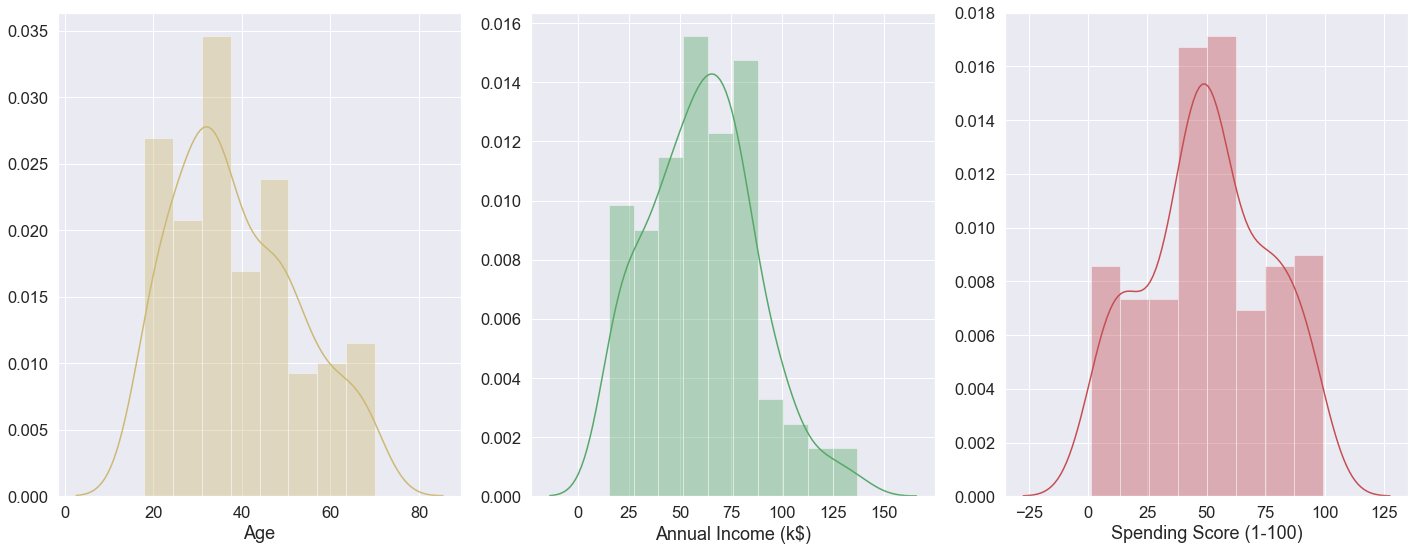

In [14]:
sns.set(style="darkgrid",font_scale=1.5)
f, axes = plt.subplots(1,3,figsize=(20,8))
sns.distplot(df["Age"], ax = axes[0], color = 'y')     
sns.distplot(df["Annual Income (k$)"], ax = axes[1], color = 'g')
sns.distplot(df["Spending Score (1-100)"],ax = axes[2], color = 'r')
plt.tight_layout()


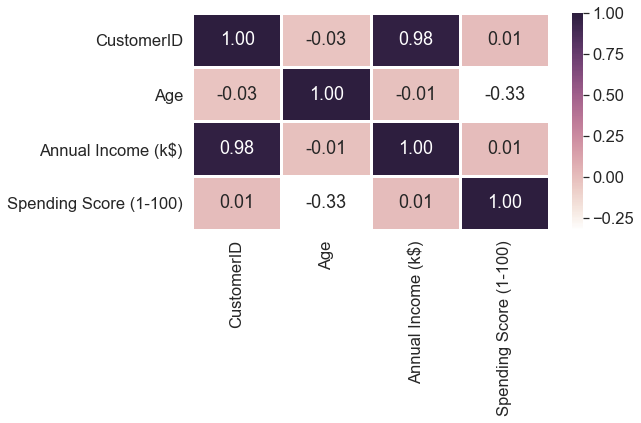

In [15]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True,cmap=sns.cubehelix_palette(light=1, as_cmap=True),fmt='.2f',linewidths=2)
plt.show()

In [22]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['Gender']= label_encoder.fit_transform(df['Gender'])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [43]:
features=['Age','Annual Income (k$)','Spending Score (1-100)']
X=df[features]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [44]:
kMeans = KMeans(n_clusters = 6, init = 'k-means++')
y_pred = kMeans.fit_predict(X)
print('Pred:\n', y_pred)
print('\n\ninertia: ', kMeans.inertia_, '\n\nclusters centers:\n', kMeans.cluster_centers_)

Pred:
 [1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 5 4 1 3 1 4 5 3 3 3 5 3 3 5 5 5 5 5 3 5 5 3 5 5 5 3 5 5 3 3 5 5 5 5
 5 3 5 3 3 5 5 3 5 5 3 5 5 3 3 5 5 3 5 3 3 3 5 3 5 3 3 5 5 3 5 3 5 5 5 5 5
 3 3 3 3 3 5 5 5 5 3 3 3 0 3 0 2 0 2 0 2 0 3 0 2 0 2 0 2 0 2 0 3 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


inertia:  58302.40630860368 

clusters centers:
 [[32.69230769 86.53846154 82.12820513]
 [44.31818182 25.77272727 20.27272727]
 [41.68571429 88.22857143 17.28571429]
 [27.         56.65789474 49.13157895]
 [25.27272727 25.72727273 79.36363636]
 [56.34090909 53.70454545 49.38636364]]


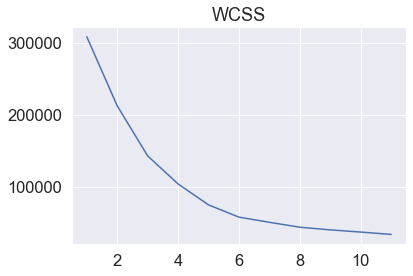

In [45]:
result = []
for i in range(1, 12):
    kMeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kMeans.fit(X)        
    result.append(kMeans.inertia_)


plt.plot(range(1,12), result)
plt.title('WCSS')
plt.show()

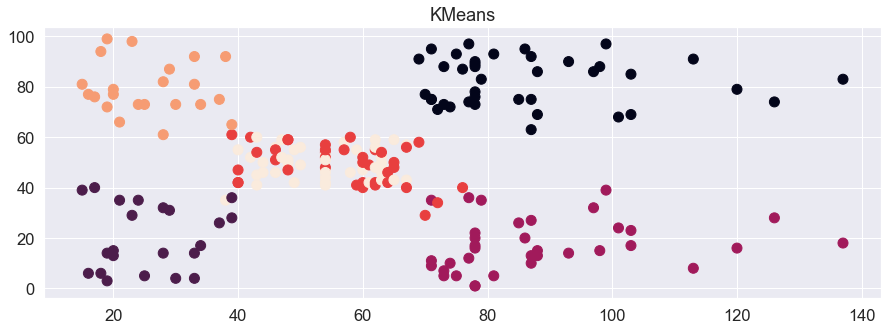

In [52]:
f, ax1 = plt.subplots(1, sharey='col', num = 10, figsize = (15,5))
ax1.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = y_pred,s = 100)
ax1.title.set_text('KMeans')

Conclusion

I have applied one clustering algorithms on the problem, I then interpret the resulting clusters. So that, the wholesale distributor may take necessary actions for each types of customers.